In [7]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import numpy as np


########################################
TCR = "local" #local;global
season = "Annual" #Annual; JJA; DJF
stat = "median" #median;STD
path = "C:/Users/windisch/Desktop/Manuscript_Revised/Final_Revision/BGPvBGC_data" #SPECIFY_DATA_PATH
########################################


"""
ANNUAL
"""
defor_local = np.asarray(Dataset(f"{path}/full_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_local = np.asarray(Dataset(f"{path}/full_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])

defor_local = np.flip(defor_local,axis=0)
refor_local = np.flip(refor_local,axis=0)

"""
AREA
"""

lat_large = np.arange(-90,90,180/np.size(defor_local,0))
lon_large = np.arange(-180,180,360/np.size(defor_local,1))

area_grid = np.zeros_like(defor_local)


#https://gis.stackexchange.com/questions/29734/how-to-calculate-area-of-1-x-1-degree-cells-in-a-raster/29743#29743
for i in range(0,np.size(defor_local,0)-1):
    area_grid[i,:]= (np.sin(lat_large[i+1]*np.pi/180) - np.sin(lat_large[i]*np.pi/180)) * (0.08333333)*np.pi/180 * 63710**2

area_grid[2159,:] = area_grid[0,0]


In [8]:
#calculate climate zone means

from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import numpy as np
from osgeo import gdal

"""
LOAD LANDCOVER DATASET
"""
###
#0 OTHER
#1 Tropical rainforest
#41 Temperate continental forest
#42 Temperate oceanic forest
#43 Temperate mountain system
#44 Temperate steppe
#6 Boreal coniferous forest
#61 Boreal mountain system
#62 Boreal tundra woodland
add_zeros = np.zeros((78,4320))

rasterload = gdal.Open("C:/BGP_Assessment/GLC2000/ecoregion_mask_GLC2000_reproj.tif")
ecoregion_mask = np.concatenate((add_zeros,np.array(rasterload.GetRasterBand(1).ReadAsArray())),axis=0)
#ecoregion_mask = np.array(rasterload.GetRasterBand(1).ReadAsArray())
rasterload = None

tropical_mask = (ecoregion_mask==1)
temperate_mask = (ecoregion_mask==42)+(ecoregion_mask==43)+(ecoregion_mask==41)+(ecoregion_mask==44)
boreal_mask = (ecoregion_mask==6)+(ecoregion_mask==61)+(ecoregion_mask==62)


#TROPICAL


#NEW AREA SPECIFIC
refor_tropical = np.where(refor_local*tropical_mask!=0,refor_local*tropical_mask,np.nan)
defor_tropical = np.where(defor_local*tropical_mask!=0,defor_local*tropical_mask,np.nan)

refor_tropical_area = np.nansum(~np.isnan(refor_tropical)*area_grid)
defor_tropical_area = np.nansum(~np.isnan(defor_tropical)*area_grid)


total_tropical_mean = (np.nansum(refor_tropical*area_grid)+np.nansum(defor_tropical*area_grid))/(refor_tropical_area+defor_tropical_area)
defor_tropical_mean = (np.nansum(defor_tropical*area_grid))/(defor_tropical_area)
refor_tropical_mean = (np.nansum(refor_tropical*area_grid))/(refor_tropical_area)

#RANGE
refor_tropical_area_mask = np.where(~np.isnan(refor_tropical),area_grid,np.nan)
refor_tropical_weighted = area_grid*refor_tropical/np.nanmean(refor_tropical_area_mask)
defor_tropical_area_mask = np.where(~np.isnan(defor_tropical),area_grid,np.nan)
defor_tropical_weighted = area_grid*defor_tropical/np.nanmean(defor_tropical_area_mask)
tropical_std = np.nanstd(np.concatenate((refor_tropical_weighted,defor_tropical_weighted),axis=0))
tropical_defor_std = np.nanstd(defor_tropical_weighted)
tropical_refor_std = np.nanstd(refor_tropical_weighted)


#TEMPERATE

###NEW AREA SPECIFIC
refor_temperate = np.where(refor_local*temperate_mask!=0,refor_local*temperate_mask,np.nan)
defor_temperate = np.where(defor_local*temperate_mask!=0,defor_local*temperate_mask,np.nan)

refor_temperate_area = np.nansum(~np.isnan(refor_temperate)*area_grid)
defor_temperate_area = np.nansum(~np.isnan(defor_temperate)*area_grid)

total_temperate_mean = (np.nansum(refor_temperate*area_grid)+np.nansum(defor_temperate*area_grid))/(refor_temperate_area+defor_temperate_area)
defor_temperate_mean = (np.nansum(defor_temperate*area_grid))/(defor_temperate_area)
refor_temperate_mean = (np.nansum(refor_temperate*area_grid))/(refor_temperate_area)

#RANGE
refor_temperate_area_mask = np.where(~np.isnan(refor_temperate),area_grid,np.nan)
refor_temperate_weighted = area_grid*refor_temperate/np.nanmean(refor_temperate_area_mask)
defor_temperate_area_mask = np.where(~np.isnan(defor_temperate),area_grid,np.nan)
defor_temperate_weighted = area_grid*defor_temperate/np.nanmean(defor_temperate_area_mask)
temperate_std = np.nanstd(np.concatenate((refor_temperate_weighted,defor_temperate_weighted),axis=0))
temperate_defor_std = np.nanstd(defor_temperate_weighted)
temperate_refor_std = np.nanstd(refor_temperate_weighted)




#BOREAL

###NEW AREA SPECIFIC
refor_boreal = np.where(refor_local*boreal_mask!=0,refor_local*boreal_mask,np.nan)
defor_boreal = np.where(defor_local*boreal_mask!=0,defor_local*boreal_mask,np.nan)

refor_boreal_area = np.nansum(~np.isnan(refor_boreal)*area_grid)
defor_boreal_area = np.nansum(~np.isnan(defor_boreal)*area_grid)

total_boreal_mean = (np.nansum(refor_boreal*area_grid)+np.nansum(defor_boreal*area_grid))/(refor_boreal_area+defor_boreal_area)
defor_boreal_mean = (np.nansum(defor_boreal*area_grid))/(defor_boreal_area)
refor_boreal_mean = (np.nansum(refor_boreal*area_grid))/(refor_boreal_area)


#RANGE
refor_boreal_area_mask = np.where(~np.isnan(refor_boreal),area_grid,np.nan)
refor_boreal_weighted = area_grid*refor_boreal/np.nanmean(refor_boreal_area_mask)
defor_boreal_area_mask = np.where(~np.isnan(defor_boreal),area_grid,np.nan)
defor_boreal_weighted = area_grid*defor_boreal/np.nanmean(defor_boreal_area_mask)
boreal_std = np.nanstd(np.concatenate((refor_boreal_weighted,defor_boreal_weighted),axis=0))
boreal_defor_std = np.nanstd(defor_boreal_weighted)
boreal_refor_std = np.nanstd(refor_boreal_weighted)


"""
CHECK DEFOR VS REFOR 
"""
refor_perc = np.nanpercentile(refor_local,95)
total_area = np.sum(area_grid[~np.isnan(refor_local)])


area_above_reforperc = np.sum(area_grid[refor_local>=refor_perc ])
relative_area = 100*area_above_reforperc/total_area
total_area = np.sum(area_grid[~np.isnan(defor_local)])


area_above_deforperc = np.sum(area_grid[defor_local>=refor_perc ])
relative_area = 100*area_above_deforperc/total_area

                         
print("tropical defor:", defor_tropical_mean,"+/-",tropical_defor_std)
print("temperate defor:",defor_temperate_mean,"+/-",temperate_defor_std)
print("boreal defor:",defor_boreal_mean,"+/-",boreal_defor_std)

print("tropical refor:", refor_tropical_mean,"+/-",tropical_refor_std)
print("temperate refor:",refor_temperate_mean,"+/-",temperate_refor_std)
print("boreal refor:",refor_boreal_mean,"+/-",boreal_refor_std)





tropical defor: 790.1975 +/- 105.628845
temperate defor: 254.89485 +/- 115.851074
boreal defor: 213.05263 +/- 43.550854
tropical refor: 523.10144 +/- 180.04956
temperate refor: 166.97827 +/- 104.062935
boreal refor: 102.73 +/- 71.7374


2890910500.0


<function matplotlib.pyplot.show(*args, **kw)>

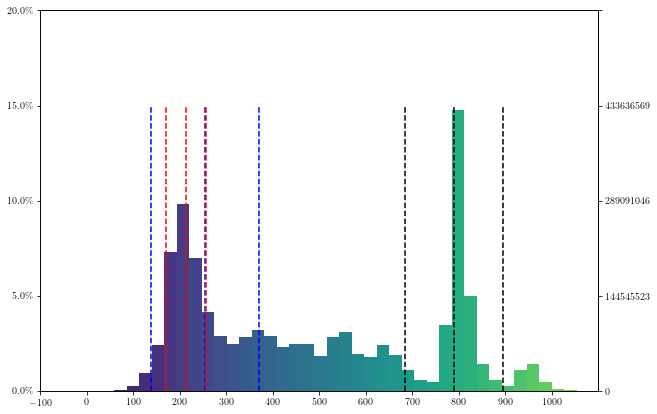

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker

total_area = np.sum(area_grid[~np.isnan(defor_local)])


#must get rid of nans for plt.hist


array_toplot = defor_local[~np.isnan(defor_local)]
area_grid_flat = area_grid[~np.isnan(defor_local)]
area_grid_flat = area_grid_flat/np.mean(area_grid_flat)



mu = np.mean(array_toplot)
sigma = np.std(array_toplot)


#let Latex render the text
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

mpl.rcParams.update(nice_fonts)



      

  
array_xmax=np.count_nonzero(array_toplot)
one_perc = array_xmax/100 

num_bin = 50

fig, axes = plt.subplots(1,1)
fig.set_size_inches(10,7)

axes2 = axes.twinx()

N, bins, patches = axes.hist(array_toplot,bins=num_bin, weights=area_grid_flat)


fracs = N / N.max()
maxfracs=80000
minfracs=0
fracs = np.arange(minfracs,maxfracs,(maxfracs-minfracs)/num_bin)
norm = colors.Normalize(0.0, 80000)

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

    

axes.yaxis.set_major_formatter(PercentFormatter(xmax=array_xmax))
axes.set_yticks(np.arange(0,21*one_perc,5*one_perc))
xticks = np.arange(-10000/100,100000.1/100,10000/100)
axes.set_xticks(ticks=xticks, minor=False)

axes2.set_yticklabels(np.arange(0,np.int64(total_area/100*20),step=np.int64(total_area/100*5)))

###CLIMATE ZONE MEAN+-STD (total_xyz_mean +- xyz_std)
total_tropical_mean = defor_tropical_mean; tropical_std = tropical_defor_std
total_temperate_mean = defor_temperate_mean; temperate_std = temperate_defor_std
total_boreal_mean = defor_boreal_mean; boreal_std = boreal_defor_std

axes2.vlines(total_tropical_mean,0,15*one_perc,linestyles='dashed',colors="k")
axes2.vlines((total_tropical_mean-tropical_std),0,15*one_perc,linestyles='dashed',colors="k")
axes2.vlines((total_tropical_mean+tropical_std),0,15*one_perc,linestyles='dashed',colors="k")

axes2.vlines(total_temperate_mean,0,15*one_perc,linestyles='dashed',colors="b")
axes2.vlines((total_temperate_mean-temperate_std),0,15*one_perc,linestyles='dashed',colors="b")
axes2.vlines((total_temperate_mean+temperate_std),0,15*one_perc,linestyles='dashed',colors="b")

axes2.vlines(total_boreal_mean,0,15*one_perc,linestyles='dashed',colors="r")
axes2.vlines((total_boreal_mean-boreal_std),0,15*one_perc,linestyles='dashed',colors="r")
axes2.vlines((total_boreal_mean+boreal_std),0,15*one_perc,linestyles='dashed',colors="r")

plt.yticks(np.arange(0, 21*one_perc, step=5*one_perc))
plt.ylim(0, 20*one_perc)
plt.xlim(-10000/100,110000/100)



plt.show


1949728900.0
check for 3'500'000km2 ~= 350005060.0


<function matplotlib.pyplot.show(*args, **kw)>

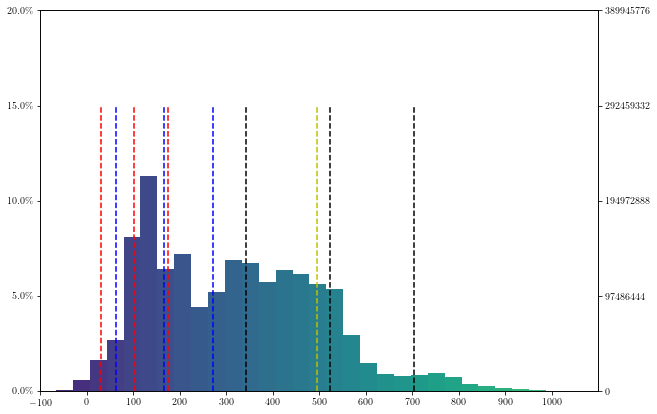

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker

total_area = np.sum(area_grid[~np.isnan(refor_local)])



#must get rid of nans for plt.hist
array_toplot = refor_local[~np.isnan(refor_local)]
area_grid_flat = area_grid[~np.isnan(refor_local)]
area_grid_flat = area_grid_flat/np.mean(area_grid_flat)
mu = np.mean(array_toplot)
sigma = np.std(array_toplot)


#let Latex render the text
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

mpl.rcParams.update(nice_fonts)



      

  
array_xmax=np.count_nonzero(array_toplot)
one_perc = array_xmax/100 

num_bin = 50

fig, axes = plt.subplots(1,1)
fig.set_size_inches(10,7)

axes2 = axes.twinx()

N, bins, patches = axes.hist(array_toplot,bins=num_bin, weights=area_grid_flat)


#fracs = N / N.max()
maxfracs=80000
minfracs=0
fracs = np.arange(minfracs,maxfracs,(maxfracs-minfracs)/num_bin)
norm = colors.Normalize(0.0, 80000)

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

    

axes.yaxis.set_major_formatter(PercentFormatter(xmax=array_xmax))
axes.set_yticks(np.arange(0,21*one_perc,5*one_perc))
xticks = np.arange(-10000/100,100000.1/100,10000/100)
axes.set_xticks(ticks=xticks, minor=False)

axes2.set_yticklabels(np.arange(0,np.int64(total_area/100*20),step=np.int64(total_area/100*5)))


bonn_thresh=495.21512 #13493.6
bonn_area = area_grid[refor_local>bonn_thresh]
print("check for 350'000'000ha ~=",np.nansum(bonn_area))
axes2.vlines(bonn_thresh,0,15*one_perc,linestyles='dashed',colors="y")


###CLIMATE ZONE MEAN+-STD (total_xyz_mean +- xyz_std)
total_tropical_mean = refor_tropical_mean; tropical_std = tropical_refor_std
total_temperate_mean = refor_temperate_mean; temperate_std = temperate_refor_std
total_boreal_mean = refor_boreal_mean; boreal_std = boreal_refor_std

axes2.vlines(total_tropical_mean,0,15*one_perc,linestyles='dashed',colors="k")
axes2.vlines((total_tropical_mean-tropical_std),0,15*one_perc,linestyles='dashed',colors="k")
axes2.vlines((total_tropical_mean+tropical_std),0,15*one_perc,linestyles='dashed',colors="k")

axes2.vlines(total_temperate_mean,0,15*one_perc,linestyles='dashed',colors="b")
axes2.vlines((total_temperate_mean-temperate_std),0,15*one_perc,linestyles='dashed',colors="b")
axes2.vlines((total_temperate_mean+temperate_std),0,15*one_perc,linestyles='dashed',colors="b")

axes2.vlines(total_boreal_mean,0,15*one_perc,linestyles='dashed',colors="r")
axes2.vlines((total_boreal_mean-boreal_std),0,15*one_perc,linestyles='dashed',colors="r")
axes2.vlines((total_boreal_mean+boreal_std),0,15*one_perc,linestyles='dashed',colors="r")


plt.yticks(np.arange(0, 21*one_perc, step=5*one_perc))
plt.ylim(0, 20*one_perc)
plt.xlim(-10000/100,110000/100)


plt.show
